# Recommender System with Python 

This is a basic recommendation system that will suggest movies to the user, based on the similarity of a particular movie to another, according to his/her interests. 

Dataset: Movielens <br>
Source: Grouplens <br>
Built by: Ikike Nkanta

In [96]:
# Lets import our libraries
import pandas as pd
import numpy as np

In [53]:
#Lets check the head of our movie data
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [54]:
#Lets check the head of our ratings data
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


Let's merge the two dataset since we will be working with both

In [55]:
df = pd.merge(movies, ratings, on ='movieId')

In [56]:
df.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,3.0,851866703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,9,4.0,938629179
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,13,5.0,1331380058
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.0,997938310
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,19,3.0,855190091


Now we have our merged dataframe. Let's do some pre-processing.

In [57]:
#Lets group and find the mean rating and order it in a descending order
df.groupby('title')['rating'].mean().sort_values(ascending = False).head()

title
Ivan Vasilievich: Back to the Future (Ivan Vasilievich menyaet professiyu) (1973)    5.0
Alien Escape (1995)                                                                  5.0
Boiling Point (1993)                                                                 5.0
Bone Tomahawk (2015)                                                                 5.0
Borgman (2013)                                                                       5.0
Name: rating, dtype: float64

In [58]:
#Let's count to see how many ratings each movie had and order it in an ascending order
df.groupby('title')['rating'].count().sort_values(ascending = False).head()

title
Forrest Gump (1994)                          341
Pulp Fiction (1994)                          324
Shawshank Redemption, The (1994)             311
Silence of the Lambs, The (1991)             304
Star Wars: Episode IV - A New Hope (1977)    291
Name: rating, dtype: int64

In [59]:
#lets put the average/mean rating in a dataframe
rating = pd.DataFrame(df.groupby('title')['rating'].mean())

In [60]:
#It's always good to have a glance of what your dataframe looks like
rating.head()

,rating
title,
"""Great Performances"" Cats (1998)",1.750000
$9.99 (2008),3.833333
'Hellboy': The Seeds of Creation (2004),2.000000
'Neath the Arizona Skies (1934),0.500000
'Round Midnight (1986),2.250000


In [61]:
# Okay, lets create a column to actually count the number of rating for each movie
rating['no_of_ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())

In [62]:
rating.head()

,rating,no_of_ratings
title,,
"""Great Performances"" Cats (1998)",1.750000,2
$9.99 (2008),3.833333,3
'Hellboy': The Seeds of Creation (2004),2.000000,1
'Neath the Arizona Skies (1934),0.500000,1
'Round Midnight (1986),2.250000,2


Now we have a dataframe with title, rating and no_of_ratings

# EDA
Let's do some EDA now!<br>
We do some imports first.

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline 

To understand our dataset, let's plot two histogram. One for the Number of ratings and the other for Average(mean) rating

Text(0, 0.5, 'No. of movies / frequency')

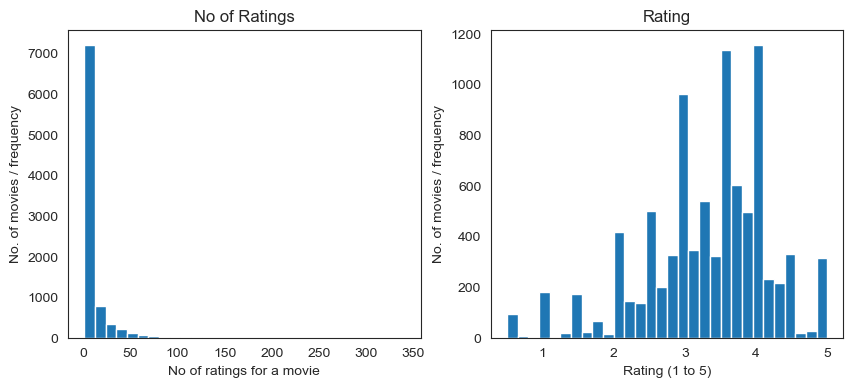

In [64]:
f, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize=(10,4))

#for number of ratings
ax1.set_title('No of Ratings')
ax1.hist(rating['no_of_ratings'], bins = 30)
ax1.set_xlabel('No of ratings for a movie')
ax1.set_ylabel('No. of movies / frequency')

#for rating
ax2.set_title('Rating')
ax2.hist(rating['rating'], bins = 30)
ax2.set_xlabel('Rating (1 to 5)')
ax2.set_ylabel('No. of movies / frequency')

If we look at the "No. of Ratings" on the left, we learn that most of the movies have 0 or 1 number of ratings! So, either, people have not watched those movies and if they have watched, they did not rate them. The first argument somehow make sense, because, most of the time we prefer to watch only the famous movies!

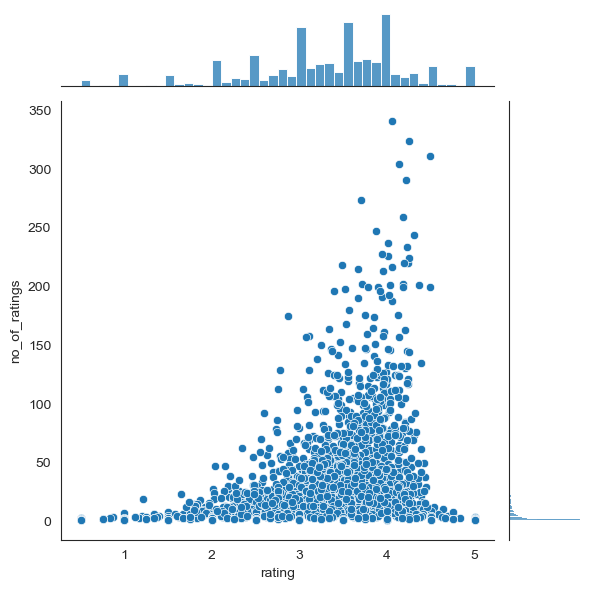

In [65]:
# Let's check the relationship between rating and no. of rating with a seaborn jointplot().
sns.jointplot(x='rating', y='no_of_ratings', data=rating)

From the joint plot, the more the number of rating a movie have, more average rating it gets.
So, the good the movie is, more people will watch it and the movie will get more number of ratings or reviews. This is a normal act.
We also see from the plot that the 1 or 2 stars movie have very few number of ratings.

# Recommender system
Since we have gotten insight to our dataset, lets proceed to building our recommendation system 

In [66]:
# Lets check the head 
df.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,3.0,851866703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,9,4.0,938629179
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,13,5.0,1331380058
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.0,997938310
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,19,3.0,855190091


Let's create a matrix that will have the userId on one axis (index) and the title on another axis (columns) whereas, rating as its value. In the way, each cell will consist of the rating that the user gave to a certain movie.

So, we need userId, title and rating columns for such matrix. We are going to use pivot_table() method to get our required matrix.

In [67]:
rating_mat = df.pivot_table(values='rating', index='userId', columns='title')

In [68]:
rating_mat.head()

title,"""Great Performances"" Cats (1998)",$9.99 (2008),'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),...,Zulu (1964),Zulu (2013),[REC] (2007),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931),İtirazım Var (2014)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
# Let's check the most rated movies once again from our rating dataframne.
rating.sort_values('no_of_ratings', ascending = False).head(10)

,rating,no_of_ratings
title,,
Forrest Gump (1994),4.054252,341
Pulp Fiction (1994),4.256173,324
"Shawshank Redemption, The (1994)",4.487138,311
"Silence of the Lambs, The (1991)",4.138158,304
Star Wars: Episode IV - A New Hope (1977),4.221649,291
Jurassic Park (1993),3.706204,274
"Matrix, The (1999)",4.183398,259
Toy Story (1995),3.872470,247
Schindler's List (1993),4.303279,244


From the above result, lets pick four(4) different movies for this project 

In [70]:
movies[movies['title']=='Forrest Gump (1994)']

,movieId,title,genres
321,356,Forrest Gump (1994),Comedy|Drama|Romance|War


In [71]:
movies[movies['title']=='Silence of the Lambs, The (1991)']

,movieId,title,genres
525,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller


In [72]:
movies[movies['title']=='Matrix, The (1999)']

,movieId,title,genres
2062,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller


In [73]:
movies[movies['title']=="Schindler's List (1993)"]

,movieId,title,genres
472,527,Schindler's List (1993),Drama|War


In [74]:
#Getting ratings from rating_mat
FG_user_ratings = rating_mat['Forrest Gump (1994)']
SList_user_ratings = rating_mat["Schindler's List (1993)"]
SL_user_ratings = rating_mat['Silence of the Lambs, The (1991)']
MT_user_ratings = rating_mat['Matrix, The (1999)']

In [75]:
FG_user_ratings.head(), SList_user_ratings.head(), SL_user_ratings.head(),MT_user_ratings.head()

(userId
 1    NaN
 2    3.0
 3    5.0
 4    5.0
 5    4.0
 Name: Forrest Gump (1994), dtype: float64,
 userId
 1    NaN
 2    4.0
 3    3.0
 4    NaN
 5    NaN
 Name: Schindler's List (1993), dtype: float64,
 userId
 1    NaN
 2    3.0
 3    3.0
 4    NaN
 5    NaN
 Name: Silence of the Lambs, The (1991), dtype: float64,
 userId
 1   NaN
 2   NaN
 3   NaN
 4   NaN
 5   NaN
 Name: Matrix, The (1999), dtype: float64)

Let's see how the user rating of the four  movies are correlated with the user rating of all other movies in the rating_mat!

In [76]:
similar_to_FG = rating_mat.corrwith(FG_user_ratings)
similar_to_SList = rating_mat.corrwith(SList_user_ratings)
similar_to_SL = rating_mat.corrwith(SL_user_ratings)
similar_to_MT = rating_mat.corrwith(MT_user_ratings)

C:\Users\PC\anaconda3\lib\site-packages\numpy\lib\function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\PC\anaconda3\lib\site-packages\numpy\lib\function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\PC\anaconda3\lib\site-packages\numpy\lib\function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\PC\anaconda3\lib\site-packages\numpy\lib\function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\PC\anaconda3\lib\site-packages\numpy\lib\function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\PC\anaconda3\lib\site-packages\numpy\lib\function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\PC\anaconda3\lib\site-packages\numpy\lib

In [77]:
similar_to_FG.head()

title
"Great Performances" Cats (1998)           NaN
$9.99 (2008)                               1.0
'Hellboy': The Seeds of Creation (2004)    NaN
'Neath the Arizona Skies (1934)            NaN
'Round Midnight (1986)                     NaN
dtype: float64

In [78]:
correlation_of_FG = pd.DataFrame(similar_to_FG, columns = ['correlation'])
correlation_of_FG.head()

,correlation
title,
"""Great Performances"" Cats (1998)",NaN
$9.99 (2008),1.0
'Hellboy': The Seeds of Creation (2004),NaN
'Neath the Arizona Skies (1934),NaN
'Round Midnight (1986),NaN


In [79]:
correlation_of_FG.dropna(inplace=True)
correlation_of_FG.head()

,correlation
title,
$9.99 (2008),1.000000
"'burbs, The (1989)",0.044946
(500) Days of Summer (2009),0.624458
*batteries not included (1987),0.603023
...And Justice for All (1979),0.173422


In [80]:
corr_of_SList = pd.DataFrame(similar_to_SList, columns = ['correlation'])
corr_of_SList.head()

,correlation
title,
"""Great Performances"" Cats (1998)",NaN
$9.99 (2008),NaN
'Hellboy': The Seeds of Creation (2004),NaN
'Neath the Arizona Skies (1934),NaN
'Round Midnight (1986),NaN


In [81]:
corr_of_SList.dropna(inplace=True)
corr_of_SList.head()

,correlation
title,
"'burbs, The (1989)",-0.013687
(500) Days of Summer (2009),0.561256
*batteries not included (1987),-0.500000
...And Justice for All (1979),-0.676123
10 Cloverfield Lane (2016),1.000000


In [82]:
corr_of_SL = pd.DataFrame(similar_to_SL, columns = ['correlation'])
corr_of_SL.head()

,correlation
title,
"""Great Performances"" Cats (1998)",NaN
$9.99 (2008),1.0
'Hellboy': The Seeds of Creation (2004),NaN
'Neath the Arizona Skies (1934),NaN
'Round Midnight (1986),NaN


In [83]:
corr_of_SL.dropna(inplace=True)
corr_of_SL.head()

,correlation
title,
$9.99 (2008),1.000000
"'burbs, The (1989)",-0.391116
(500) Days of Summer (2009),-0.053667
*batteries not included (1987),-0.055852
...And Justice for All (1979),-0.072759


In [84]:
corr_of_MT = pd.DataFrame(similar_to_MT, columns = ['correlation'])
corr_of_MT.head()

,correlation
title,
"""Great Performances"" Cats (1998)",NaN
$9.99 (2008),1.0
'Hellboy': The Seeds of Creation (2004),NaN
'Neath the Arizona Skies (1934),NaN
'Round Midnight (1986),NaN


In [85]:
corr_of_MT.dropna(inplace=True)
corr_of_MT.head()

,correlation
title,
$9.99 (2008),1.000000
"'burbs, The (1989)",0.056624
(500) Days of Summer (2009),0.368837
*batteries not included (1987),0.743955
...And Justice for All (1979),-0.610170


So, in the recently created four dataframes above, the index is the title of the movie whereas the correlation column tells how correlated the user rating of Forrest Gump, Schindler's List, Silence of the Lambs and Matrix are to the user rating of the other movies.

This is perfect correlation! Though the results may not  make much sense.

We need to fix this and we know what the reason is. Most likely, these movies are watched only once by the same users who also watched Matrix and rated both with similar stars.

To fix this, we can set a threshold value for the ratings
Let's re-plot a histogram for n_rating to see which could be a good threshold value for no of ratings!

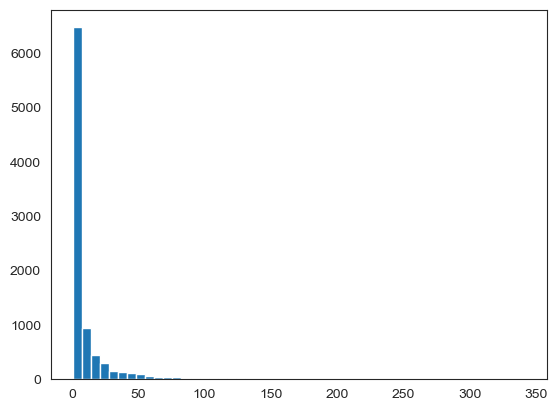

In [86]:
plt.hist(rating['no_of_ratings'], bins = 50);

From our plot above, we see that the drop is significant after no_of_rating = 50.

We can select 50 as a minimum no. of rating in order to be considered into our recommender system. Any number could be played with to see how the result will vary.

Let's sort the value again with the condition (n_rating >50) and also join the no_of_rating column from rating dataframe to the four(4) dataframes and apply the condition for n_rating > 50

In [87]:
# Forrest Gump
correlation_of_FG = correlation_of_FG.join(rating['no_of_ratings'])
correlation_of_FG.head()

,correlation,no_of_ratings
title,,
$9.99 (2008),1.000000,3
"'burbs, The (1989)",0.044946,19
(500) Days of Summer (2009),0.624458,45
*batteries not included (1987),0.603023,7
...And Justice for All (1979),0.173422,13


In [88]:
correlation_of_FG[correlation_of_FG['no_of_ratings']>50].sort_values('correlation', ascending = False).head()

,correlation,no_of_ratings
title,,
Forrest Gump (1994),1.000000,341
My Big Fat Greek Wedding (2002),0.626240,51
"Beautiful Mind, A (2001)",0.575922,114
"Few Good Men, A (1992)",0.555206,76
Million Dollar Baby (2004),0.545638,65


From the result above, Forrest Gump has the perfect correlation to itself. My Big Fat Greek Wedding is closely correlated by Forrest Gump, followed with others!

In [89]:
# Schindler's List
corr_of_SList = corr_of_SList.join(rating['no_of_ratings'])
corr_of_SList.head()

,correlation,no_of_ratings
title,,
"'burbs, The (1989)",-0.013687,19
(500) Days of Summer (2009),0.561256,45
*batteries not included (1987),-0.500000,7
...And Justice for All (1979),-0.676123,13
10 Cloverfield Lane (2016),1.000000,5


In [90]:
corr_of_SList[corr_of_SList['no_of_ratings']>50].sort_values('correlation', ascending = False).head()

,correlation,no_of_ratings
title,,
Schindler's List (1993),1.000000,244
Avatar (2009),0.664693,67
Casper (1995),0.657224,58
"Patriot, The (2000)",0.655913,65
"Pianist, The (2002)",0.652226,61


From the result above, Schindler's List has the perfect correlation to itself. Avatar is closely correlated with Schindler's List, followed by others!

In [91]:
# Silence of the Lambs
corr_of_SL = corr_of_SL.join(rating['no_of_ratings'])
corr_of_SL.head()

,correlation,no_of_ratings
title,,
$9.99 (2008),1.000000,3
"'burbs, The (1989)",-0.391116,19
(500) Days of Summer (2009),-0.053667,45
*batteries not included (1987),-0.055852,7
...And Justice for All (1979),-0.072759,13


In [92]:
corr_of_SL[corr_of_SL['no_of_ratings']>50].sort_values('correlation', ascending = False).head()

,correlation,no_of_ratings
title,,
"Silence of the Lambs, The (1991)",1.000000,304
Scream (1996),0.672229,73
"Goonies, The (1985)",0.592957,51
Requiem for a Dream (2000),0.574694,69
"40-Year-Old Virgin, The (2005)",0.559457,51


From the result above, Silence of the Lambs has the perfect correlation to itself. Scream is closely correlated with Silence of the Lambs, followed by others!

In [93]:
# Matrix 
corr_of_MT = corr_of_MT.join(rating['no_of_ratings'])
corr_of_MT.head()

,correlation,no_of_ratings
title,,
$9.99 (2008),1.000000,3
"'burbs, The (1989)",0.056624,19
(500) Days of Summer (2009),0.368837,45
*batteries not included (1987),0.743955,7
...And Justice for All (1979),-0.610170,13


In [94]:
corr_of_MT[corr_of_MT['no_of_ratings']>50].sort_values('correlation', ascending = False).head()

,correlation,no_of_ratings
title,,
"Matrix, The (1999)",1.000000,259
Star Trek: Generations (1994),0.509976,114
"Prestige, The (2006)",0.458716,52
"Lord of the Rings: The Two Towers, The (2002)",0.451960,188
"Lord of the Rings: The Fellowship of the Ring, The (2001)",0.441993,200


From the result above, Matrix has the perfect correlation to itself. Star Trek: Generations is closely correlated with Matrix, followed by others!

# Thank you 